<a href="https://colab.research.google.com/github/COMP4702-UQ/Pracs-notebook/blob/main/PracW7-Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import random

print(torch.__version__)

# Library for Progres Bar during training
!pip install tqdm

2.6.0+cu124


In [2]:
# Optional to run code on GPU
# Check if CUDA is available and if device is GPU
print('Cuda Available : {}'.format(torch.cuda.is_available()))
print('GPU - {0}'.format(torch.cuda.get_device_name()))

# Note:
# If this gives you an error on Google colab, go into 'Additional connection otions' > 'Change runtime type' > Select a GPU as the Hardware Accelerator
# If you're running code on your machine locally, your machine needs have a GPU supported graphics card and CUDA installed.

Cuda Available : True
GPU - Tesla T4


### [Beginner tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) on how to train a classifier with PyTorch on image data

## Q3

### LOAD & VISUALISE MNIST

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.58MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]
100%|██████████| 1.65M/1.65M [00:06<00:00, 244kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.53MB/s]


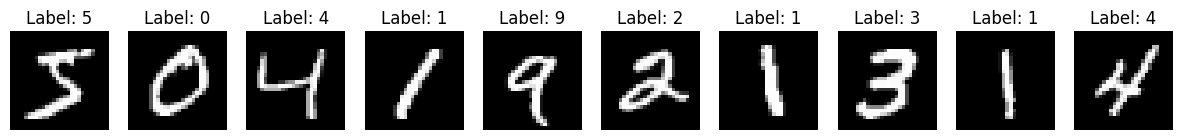

In [4]:
# Load MNIST dataset
mnist_train = datasets.MNIST('data', train=True, download=True)
mnist_test = datasets.MNIST('data', train=False, download=True)

import matplotlib.pyplot as plt

# Define a function to visualize images and their labels
def visualize_samples(dataset, num_samples=10):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        image, label = dataset[i]
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'Label: {label}')
        axes[i].axis('off')
    plt.show()

# Visualize samples from the training set
visualize_samples(mnist_train)

### STATISTICS OF MNIST

In [5]:
print('Min Pixel Value: {} \nMax Pixel Value: {}'.format(mnist_train.data.min(), mnist_train.data.max()))
print('Mean Pixel Value {} \nPixel Values Std: {}'.format(mnist_train.data.float().mean(), mnist_train.data.float().std()))
print('Scaled Mean Pixel Value {} \nScaled Pixel Values Std: {}'.format(mnist_train.data.float().mean() / 255, mnist_train.data.float().std() / 255))

Min Pixel Value: 0 
Max Pixel Value: 255
Mean Pixel Value 33.31842041015625 
Pixel Values Std: 78.56748962402344
Scaled Mean Pixel Value 0.13066047430038452 
Scaled Pixel Values Std: 0.30810779333114624


### NORMALIZE MNIST AND PREPARE DATA FOR TRAINING

In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to tensor
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize the pixel values
])

# TODO: Load MNIST training dataset with transformations

# TODO: Split dataset into training, validation, and test sets

# TODO: Define data loaders
train_loader = ...
val_loader = ...
test_loader = ...

### DEFINE MLP

In [ ]:
# Define MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # TODO: define the layers of the model here

    def forward(self, x):
        # TODO: pass the data through each layer of the model here

        return x

### TRAINING

In [ ]:
from tqdm import tqdm

# Initialize model
model = MLP()

# TODO: Define the following for your model
# loss function
# learning rate
# optimizer (e.g., SGD, Adam)
# number of epochs to train the model

for epoch in range(num_epochs):
    # TODO: train the model
      # get the inputs from train data loader
      # zero the parameter gradients
      # forward pass through the model
      # backward propagation + optimize
      # print statistics

    # TODO: Validate the model
      # get inputs from validation data loader
      # forward pass + get predicted outputs
      # calculate accuracy of predictions
      # print statistics

Epoch 1: 100%|██████████| 750/750 [00:16<00:00, 46.50it/s]


Epoch [1/10], Validation Accuracy: 90.44%


Epoch 2: 100%|██████████| 750/750 [00:09<00:00, 77.71it/s]


Epoch [2/10], Validation Accuracy: 92.23%


Epoch 3: 100%|██████████| 750/750 [00:09<00:00, 78.64it/s]


Epoch [3/10], Validation Accuracy: 93.43%


Epoch 4: 100%|██████████| 750/750 [00:09<00:00, 78.43it/s]


Epoch [4/10], Validation Accuracy: 94.14%


Epoch 5: 100%|██████████| 750/750 [00:09<00:00, 76.96it/s]


Epoch [5/10], Validation Accuracy: 94.60%


Epoch 6: 100%|██████████| 750/750 [00:09<00:00, 77.85it/s]


Epoch [6/10], Validation Accuracy: 95.07%


Epoch 7: 100%|██████████| 750/750 [00:10<00:00, 71.60it/s]


Epoch [7/10], Validation Accuracy: 95.15%


Epoch 8: 100%|██████████| 750/750 [00:10<00:00, 74.89it/s]


Epoch [8/10], Validation Accuracy: 95.53%


Epoch 9: 100%|██████████| 750/750 [00:10<00:00, 73.53it/s]


Epoch [9/10], Validation Accuracy: 95.85%


Epoch 10: 100%|██████████| 750/750 [00:10<00:00, 73.07it/s]


Epoch [10/10], Validation Accuracy: 95.97%


### Testing

In [ ]:
# TODO: Evaluate the model on the test data
  # get inputs from test data loader
      # forward pass + get predicted outputs
      # calculate accuracy of predictions
      # print statistics

Test Accuracy: 96.01%


### VISUALISE PREDICTION

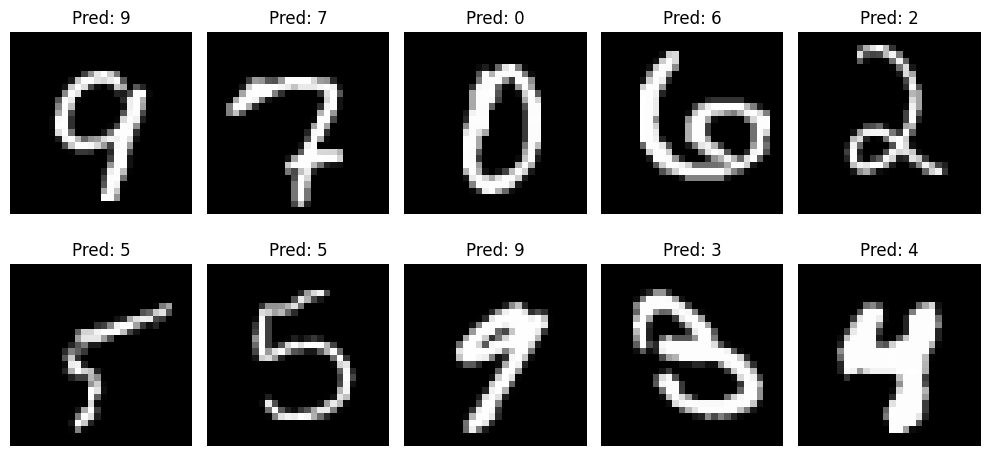

In [ ]:
# TODO: Get the model prediction on test images

# Plotting
images = images.cpu()
predicted = predicted.cpu()
random_indices = random.sample(range(len(images)), 10)

plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[idx].squeeze(), cmap='gray')
    plt.title(f'Pred: {predicted[idx].item()}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Q4

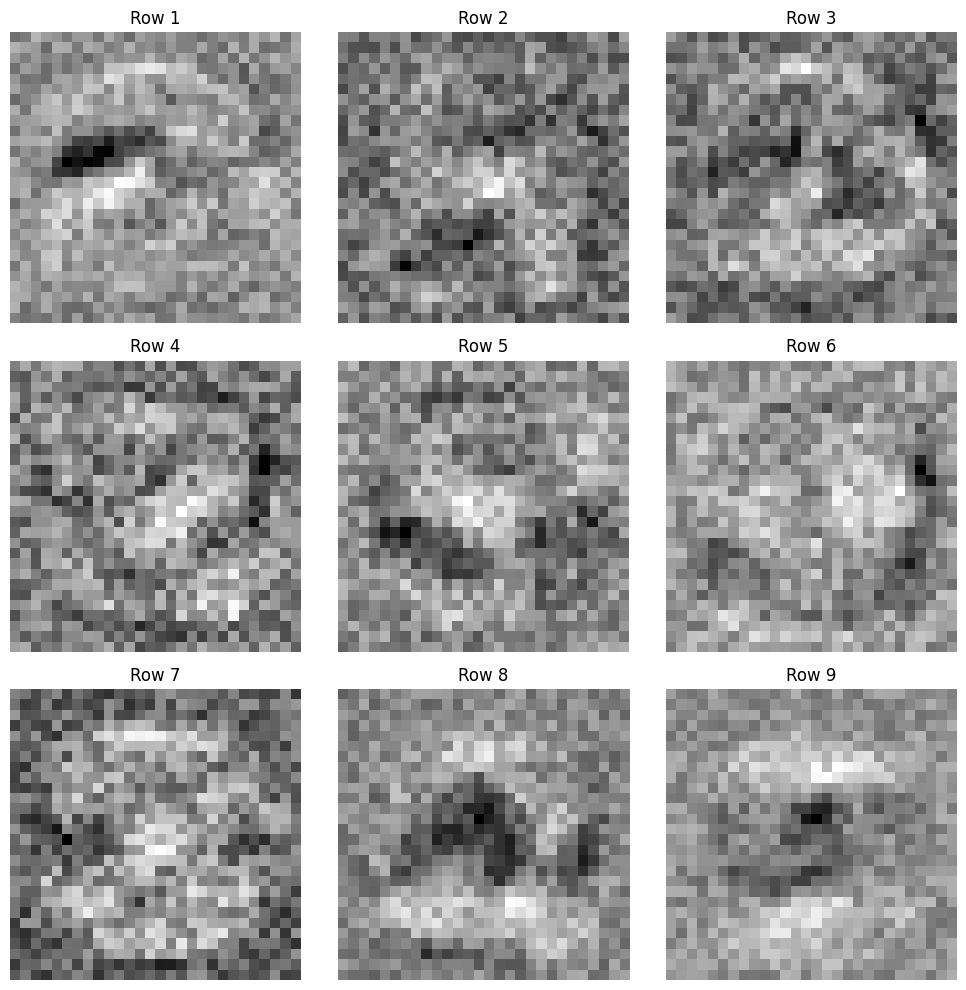

In [ ]:
# TODO: Extract the weight matrix of the first hidden layer
weight_matrix = ...

# Visualize 9 rows of the weight matrix
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)

    # TODO: Normalize the weights to [0, 1]
    weights_normalized = ...

    # TODO: Reshape the weights to 28x28 to visualize as an image
    weights_image = ...
    
    # Visualise the weights
    plt.imshow(weights_image, cmap='gray')
    plt.title(f"Row {i + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()